In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


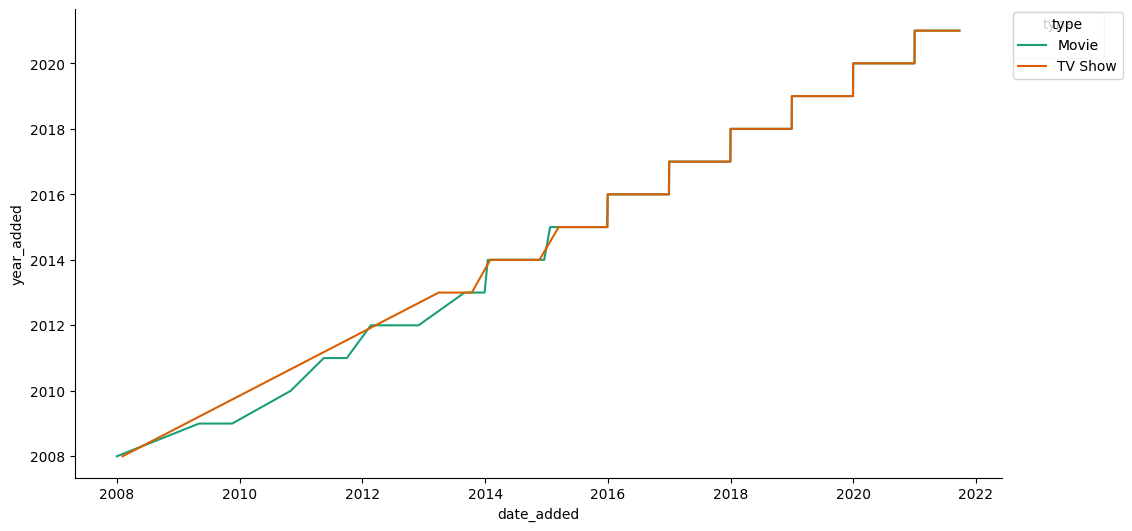

In [ ]:
# @title date_added vs year_added

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['year_added']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('year_added')

In [ ]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values where necessary
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Fill NaNs with 'Unknown' for string columns
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)

# Optional: Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year


## Movies vs Tv Shows


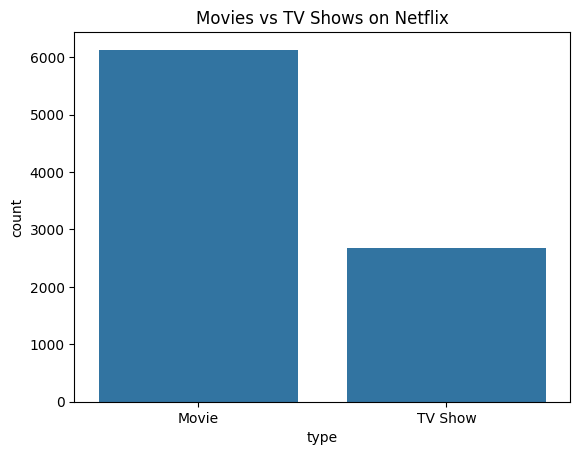

In [ ]:
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows on Netflix')
plt.show()


## Content Added over the time

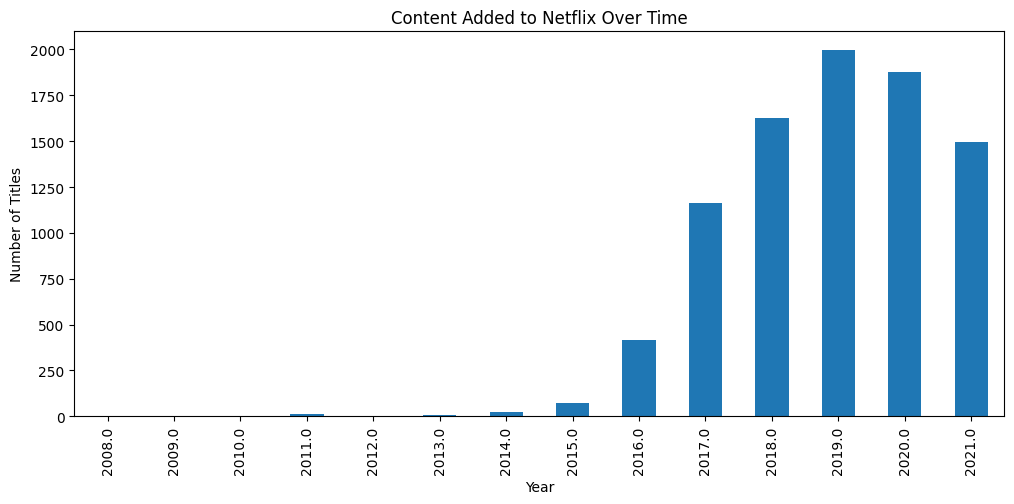

In [ ]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


## Top 10 Generes

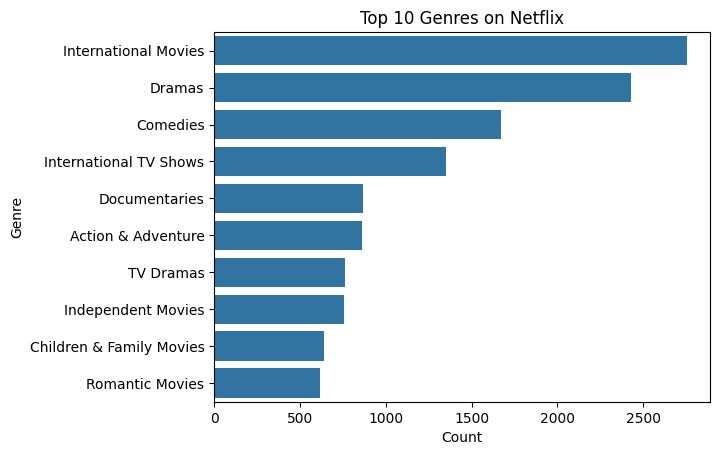

In [ ]:
# Genres are comma-separated. Split and count
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = Counter(flat_genres)

top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title('Top 10 Genres on Netflix')
plt.show()


## Most frequent Actors

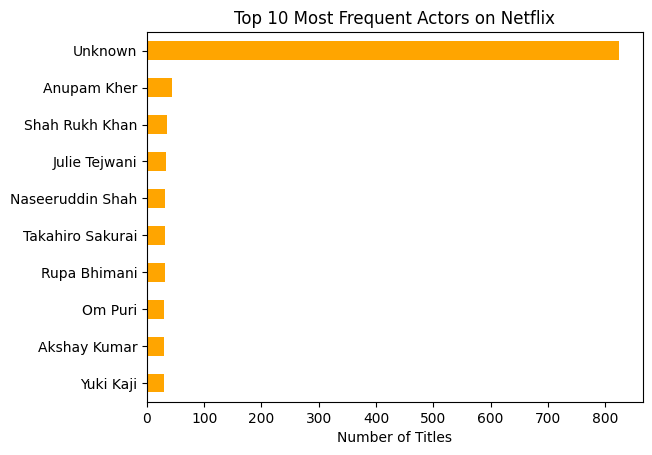

In [ ]:
cast = df['cast'].dropna().str.split(', ')
flat_cast = [actor.strip() for sublist in cast for actor in sublist]
top_actors = pd.Series(flat_cast).value_counts().head(10)

top_actors.plot(kind='barh', title='Top 10 Most Frequent Actors on Netflix', color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Number of Titles')
plt.show()



## Top Netflix Users by Country

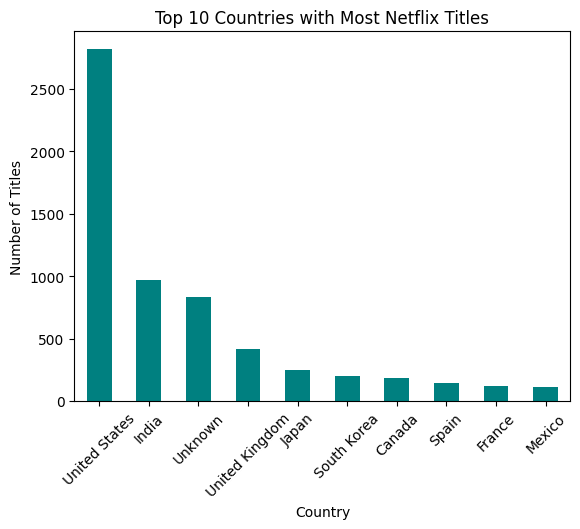

In [ ]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

